# Import libraries and Inizialization

In [ ]:
!pip install split-folders
!pip install visualkeras

In [28]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

#used to manage kaggle directory 
import shutil
#used to split the dataset
import splitfolders
#used to have a graphical representation of the model
import visualkeras

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


### Set seed for reproducibility

In [4]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Suppress warnings

In [5]:
import warnings
import logging

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Data preparation and augmentation

In [6]:
labels = [
    "Species1",  #1
    "Species2",  #2
    "Species3",  #3
    "Species4",  #4
    "Species5",  #5
    "Species6",  #6
    "Species7",  #7
    "Species8",  #8
]

In [7]:
#Spit the dataset in Train-Validation-Test Set
dataset_dir = './dataset'

if not(os.path.exists(dataset_dir)) :
    print('splitting')
    #we decided to use a fixed number of sample to have a balanced Validation and Test Sets 
    source="../input/an2dl-data/training_data_final"
    splitfolders.fixed(source, 
                       output="dataset",
                       seed=seed, 
                       fixed=(30, 20), 
                       oversample=False, 
                       group_prefix=None, 
                       move=False)
    
# Setting dataset directories
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

splitting


Copying files: 3542 files [00:10, 341.07 files/s]


In [8]:
#Function used to print the Number Of Sample for each class in the train Set
def count_dir_files(): 
    count_dir = {}
    for sp in labels:
        count_dir[sp] = len(os.listdir(dataset_dir+"/train/"+sp))

    return count_dir

### Data Augmentation

In [9]:
#We decided to Augment the Dataset (that seems poor) and balance the number of sample for each class

#This is the type of augmentation we decided to make
image_generator_train = ImageDataGenerator(rotation_range=91,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True,
                                         brightness_range=(0.7,1.3), 
                                         vertical_flip=True,
                                         zoom_range=0.3,
                                         fill_mode='reflect')

data_gen_spec1 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species1'],
                                                     batch_size=136,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species1',
                                                     save_format='jpg',
                                                     save_prefix="augmented")
#each class has a different number of repetition to balance the dataset
for i in range(14):
    data_gen_spec1.next()
    
data_gen_spec6 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species6'],
                                                     batch_size=172,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species6',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(11):
    data_gen_spec6.next()

data_gen_spec2 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species2'],
                                                     batch_size=482,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species2',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(3):
    data_gen_spec2.next()
    

data_gen_spec3 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species3'],
                                                     batch_size=465,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species3',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(3):
    data_gen_spec3.next()
    
    

data_gen_spec4 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species4'],
                                                     batch_size=461,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species4',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(3):
    data_gen_spec4.next()
    
    

data_gen_spec5 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species5'],
                                                     batch_size=481,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species5',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(3):
    data_gen_spec5.next()
    
    

data_gen_spec7 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species7'],
                                                     batch_size=487,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species7',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(3):
    data_gen_spec7.next()
    
    

data_gen_spec8 = image_generator_train.flow_from_directory(directory='./dataset/train',
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes=['Species8'],
                                                     batch_size=458,
                                                     shuffle = True,
                                                     save_to_dir='./dataset/train/Species8',
                                                     save_format='jpg',
                                                     save_prefix="augmented")

for i in range(3):
    data_gen_spec8.next()


Found 136 images belonging to 1 classes.
Found 172 images belonging to 1 classes.
Found 482 images belonging to 1 classes.
Found 465 images belonging to 1 classes.
Found 461 images belonging to 1 classes.
Found 481 images belonging to 1 classes.
Found 487 images belonging to 1 classes.
Found 458 images belonging to 1 classes.


In [11]:
count_dir_files()

{'Species1': 2040,
 'Species2': 1928,
 'Species3': 1860,
 'Species4': 1844,
 'Species5': 1924,
 'Species6': 2064,
 'Species7': 1948,
 'Species8': 1832}

In [21]:
#this is used to manage the dataset: used to delete the dataset when we needed to change the Augmentation
shutil.rmtree("./dataset")

In [10]:
#We decided to rescale the Images for a better training phase
image_generator_train = ImageDataGenerator(rescale = 1./255)
image_generator_validation = ImageDataGenerator(rescale = 1./255)
image_generator_test = ImageDataGenerator(rescale = 1./255)

train_data = image_generator_train.flow_from_directory(training_dir,
                                                       target_size = (96,96),
                                                       color_mode = 'rgb',
                                                       classes = None,
                                                       batch_size = 128,
                                                       shuffle = True,
                                                       seed = seed)

validation_data = image_generator_validation.flow_from_directory(validation_dir,
                                                                 target_size = (96,96),
                                                                 color_mode = 'rgb',
                                                                 classes = None,
                                                                 batch_size = 64,
                                                                 shuffle = False,
                                                                 seed = seed)

test_data = image_generator_test.flow_from_directory(test_dir,
                                                     target_size = (96,96),
                                                     color_mode = 'rgb',
                                                     classes = None,
                                                     batch_size = 64,
                                                     shuffle = False,
                                                     seed = seed)

Found 15440 images belonging to 8 classes.
Found 240 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


# Model Definition

In [13]:
#Model Parameter
input_shape = (96, 96, 3)
epochs = 100

dropoutrate = 0.4
elastic_lambda = 1e-4

learningRate=1e-3

In [16]:
def build_model(input_shape, dropoutrate,learningRate,elastic_lambda):
    #------ Input Layer ------
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')
    
    #------ Convolution layer 1 ------
    conv1 = tfkl.Conv2D(
        filters=32,
        kernel_size=3,
        padding = 'same',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)
    conv1 = tfkl.LeakyReLU()(conv1)
    
    #------ Pool Layer 1 ------
    pool1 = tfkl.MaxPooling2D()(conv1)
    
    #------ Convolution layer 2 ------
    conv2 = tfkl.Conv2D(
        filters=64,
        kernel_size=3,
        padding = 'same',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool1)
    conv2 = tfkl.LeakyReLU()(conv2)
    
    #------ Pool Layer 2 ------
    pool2 = tfkl.MaxPooling2D()(conv2)

    #------ Convolution layer 3 ------
    conv3 = tfkl.Conv2D(
        filters=128,
        kernel_size=3,
        padding = 'same',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool2)
    conv3 = tfkl.LeakyReLU()(conv3)
    
    #------ Pool Layer 3 ------
    pool3 = tfkl.MaxPooling2D()(conv3)
    
    #------ Convolution layer 4 ------
    conv4 = tfkl.Conv2D(
        filters=256,
        kernel_size=3,
        padding = 'same',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(pool3)
    conv4 = tfkl.LeakyReLU()(conv4)
    
    #------ Pool Layer 4 ------
    pool4 = tfkl.MaxPooling2D()(conv4)
    
    #------ Global Averaging Pooling Layer ------
    glob_pooling = tfkl.GlobalAveragePooling2D(name='GlobalPooling')(pool4)
    
    #------ Fully Conncented: hidden layer 1 ------
    classifier_layer1 = tfkl.Dense(units=256,
                                   name='Classifier1',
                                   kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda),
                                   kernel_initializer=tfk.initializers.HeUniform(seed) 
                                  )(glob_pooling)
    leaky_relu_layer_clas = tfkl.LeakyReLU()(classifier_layer1)
    
    #------ Drop Out ------
    dropout = tfkl.Dropout(dropoutrate, seed=seed)(leaky_relu_layer_clas)
    
    #------ OutPut Layer------
    output_layer = tfkl.Dense(units=8,
                              activation='softmax',
                              kernel_initializer=tfk.initializers.HeUniform(seed),
                              name='output_layer')(dropout)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model, choose the optimizer and the loss
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learningRate), metrics='accuracy')

    # Return the model
    return model

In [21]:
# Build model
model = build_model(input_shape, dropoutrate,learningRate,elastic_lambda)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0     

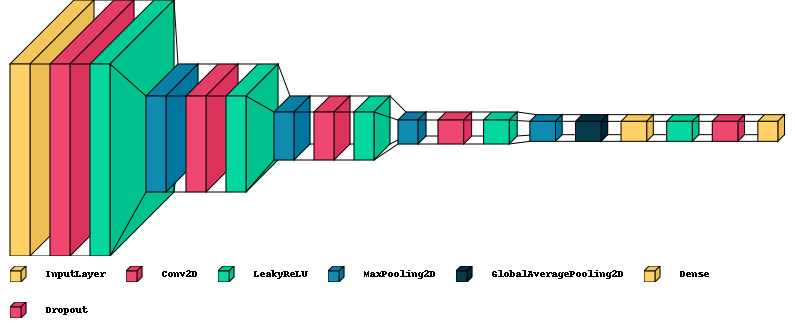

In [29]:
#Graphical representation of the Model
visualkeras.layered_view(model, legend=True, spacing=20, scale_xy=2)

In [22]:
# Create folders and callbacks and fit
callbacks = []

#----- Early Stopping ------
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                               patience=10, 
                                               restore_best_weights=True)
callbacks.append(es_callback)

#------ ReduceLROnPlateau ------
red_lr_callback = tfk.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  patience=8, factor=0.3)
callbacks.append(red_lr_callback)

### It's Training Time!

In [23]:
# Train the model
history = model.fit(
    x = train_data,
    epochs = epochs,
    validation_data = validation_data,
    callbacks = callbacks,
).history

Epoch 1/100
121/121 [==============================] - 14s 109ms/step - loss: 2.3455 - accuracy: 0.3043 - val_loss: 2.5993 - val_accuracy: 0.2708
Epoch 2/100
121/121 [==============================] - 13s 108ms/step - loss: 2.0201 - accuracy: 0.4149 - val_loss: 1.8892 - val_accuracy: 0.4667
Epoch 3/100
121/121 [==============================] - 13s 103ms/step - loss: 1.8443 - accuracy: 0.4699 - val_loss: 1.9408 - val_accuracy: 0.4042
Epoch 4/100
121/121 [==============================] - 14s 112ms/step - loss: 1.6908 - accuracy: 0.5075 - val_loss: 1.7477 - val_accuracy: 0.4542
Epoch 5/100
121/121 [==============================] - 13s 111ms/step - loss: 1.5886 - accuracy: 0.5339 - val_loss: 1.5956 - val_accuracy: 0.5042
Epoch 6/100
121/121 [==============================] - 13s 111ms/step - loss: 1.4705 - accuracy: 0.5659 - val_loss: 1.5122 - val_accuracy: 0.5500
Epoch 7/100
121/121 [==============================] - 12s 101ms/step - loss: 1.3761 - accuracy: 0.5892 - val_loss: 1.3201 -

# Model Evaluation

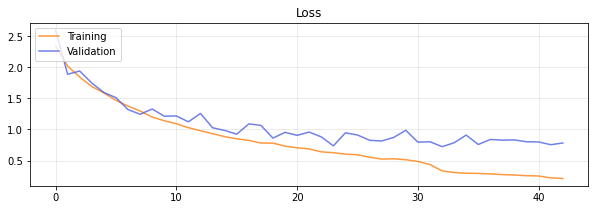

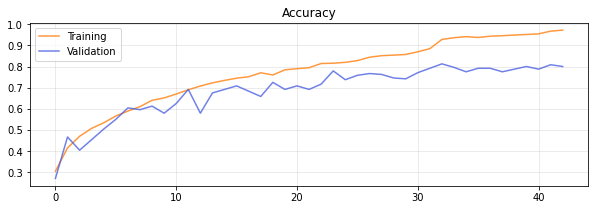

In [25]:
# Plot the Accuracy and The Loss of The Model during the Training Phase

#Loss
plt.figure(figsize=(10,3))
plt.plot(history['loss'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Loss')
plt.grid(alpha=.3)

#Accuracy 
plt.figure(figsize=(10,3))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

Confusion Matrix


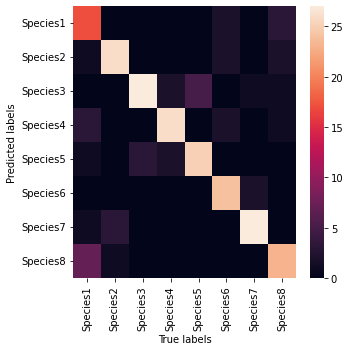

4/4 [==============================] - 0s 49ms/step - loss: 0.7234 - accuracy: 0.8125
{'loss': 0.723436713218689, 'accuracy': 0.8125}


In [30]:
#Compute some Evaluation Metric on the Validation Set

#Make the Predcition on the Dataset
Y_pred = model.predict(validation_data)
y_pred = np.argmax(Y_pred, axis=1)

#Draw The confusion Matrix
print('Confusion Matrix')
cm=confusion_matrix(validation_data.classes, y_pred);
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, xticklabels=labels, yticklabels=labels)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

#Print Accuracy on The Validation Set
metrics = model.evaluate(validation_data, return_dict=True)
print(metrics)

Confusion Matrix


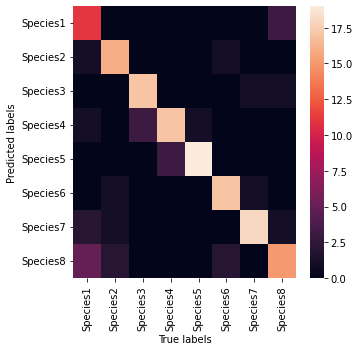

3/3 [==============================] - 0s 36ms/step - loss: 0.7553 - accuracy: 0.8125
{'loss': 0.7553051710128784, 'accuracy': 0.8125}


In [33]:
#Compute some Evaluation Metric on the Test Set

#Make the Predcition on the Dataset
Y_pred = model.predict(test_data)
Test_y_pred = np.argmax(Y_pred, axis=1)

#Draw The confusion Matrix
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes, Test_y_pred);
plt.figure(figsize=(5,5))
sns.heatmap(cm.T, xticklabels=labels, yticklabels=labels)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

#Print Accuracy on The Test Set
metrics = model.evaluate(test_data, return_dict=True)
print(metrics)

In [34]:
#Print a More accurate Report on the TestData evaluated Dataset
print(classification_report(test_data.classes, Test_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.89      0.80      0.84        20
           2       0.89      0.85      0.87        20
           3       0.77      0.85      0.81        20
           4       0.86      0.95      0.90        20
           5       0.89      0.85      0.87        20
           6       0.82      0.90      0.86        20
           7       0.62      0.75      0.68        20

    accuracy                           0.81       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.82      0.81      0.81       160



### Model Management

In [24]:
# Save The Model
name = "FromScratchModel"
model.save(name)